In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Path dataset
path = '/Users/samyakarzazielbachiri/Documents/Hackathons/optimitzuab/databases/uab-data/'
rec_carac = pd.read_csv(path + 'recursos_caracteristicas.csv', sep=',')
carac = pd.read_csv(path + 'caracteristicas.csv', sep=',')
rec_carac.head() 

,ID_RECURS,ID_CARACTERISTICA,ID_CENTRE_ADMINISTRADOR,IND_PCT_REC_CENTRE,IND_VALOR_CARAC_NUMERIC,IND_VALOR_CARAC_ALFANUMERIC,ID_DATA_VIG_INI_VALOR,ID_DATA_VIG_FIN_VALOR
0,503,1000,5095,1,NaN,CT,NaN,NaN
1,503,1003,0,1,NaN,00,NaN,NaN
2,503,1003,0,1,NaN,00,NaN,NaN
3,503,1003,5095,1,NaN,00,NaN,NaN
4,503,1003,5095,1,NaN,00,NaN,NaN


In [33]:
# Count lines
print("Count lines: ", carac.shape[0])

Count lines:  84


* ID_RECURS :  [    1     2     4 ... 13122 13123 13124]
ID_RECURS
11090    328
12771    328
10187    295
6351     282
4161     282
        ... 
11265      4
9982       2
9843       2
10002      2
12561      2
Name: count, Length: 12001, dtype: int64


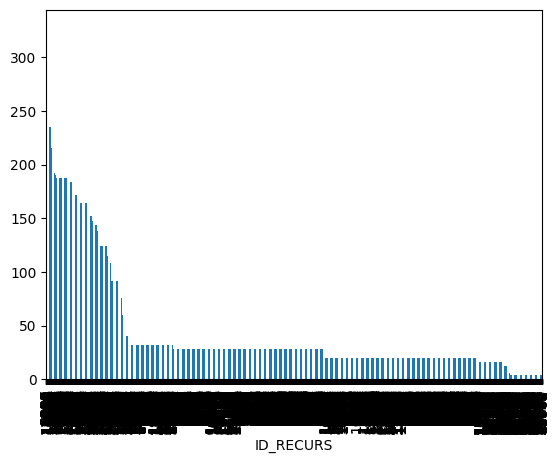

* ID_CARACTERISTICA :  [1000 1004 1002 1066 1001 1036 1003 1022 1006 1041 1034 1074 1037 1046
 1014 1013 1050 1042 1026 1028 1025    7    5 1044 1063 1047 1027 1033
 1019 1030 1054 1052 1045 1035 1072 1053 1058 1060 1010 1024 1061 1009
 1008 1020 1005 1065 1068 1073 1067 1048 1031 1062 1038 1069 1071 1007
 1023 1059 1018 1064 1029 1016 1077 1040 1056 1055 1057 1079]
ID_CARACTERISTICA
1001    48449
1000    41074
1002    41074
1004    41074
1003    40986
        ...  
1055      559
1057      559
1029      471
1016      471
1079      114
Name: count, Length: 68, dtype: int64


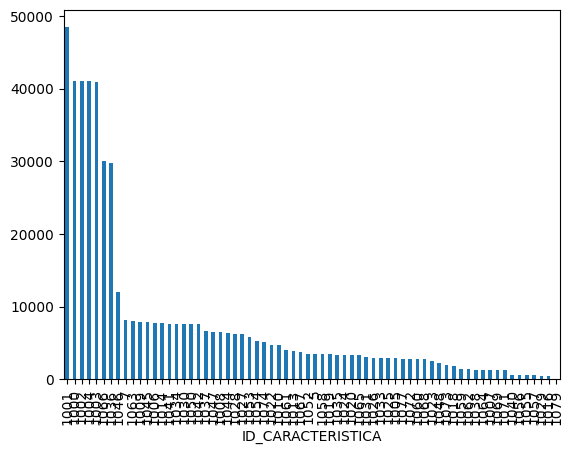

* ID_CENTRE_ADMINISTRADOR :  [   0 5120  405 2972 5150 5140  145 5145  103 1253  105  108 5090  102
 5130  413 5209  600  101 5135  455  429  441  115 5155  111  107 5125
 2299  447 5193 5320  403 5095  428  433 5160  412  464  458  110  407
  432  478  406  466  409  467  463  720  113  483  484  457  404  456
 5601 5603  436  470  462 5122  426  114  945  434  415 5091  471  402
  459  410  468  469  431  438  427  452  414  430  465  461  422  418
  109  411  106  454  439  437  688  423  421  201  206  472  477  104
  515 5127  523  417  442 5136  118  416 5128  450 5132 5112 5100 5186
  479 5126 2824 5092  485 1138]
ID_CENTRE_ADMINISTRADOR
0       253149
5120     28206
5135     16625
102      16497
5130     14441
         ...  
479         30
118          9
416          7
1138         6
485          4
Name: count, Length: 118, dtype: int64


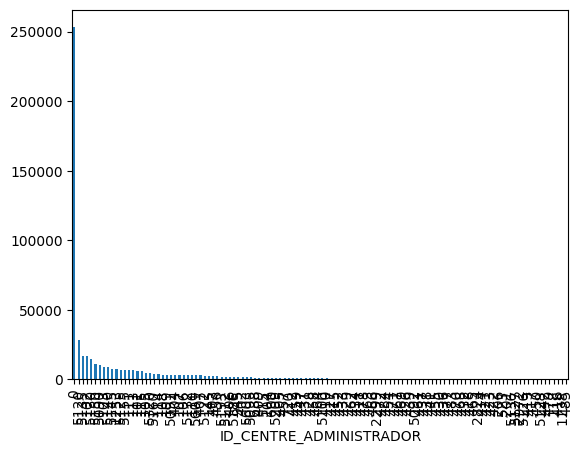

,ID_RECURS,ID_CARACTERISTICA,ID_CENTRE_ADMINISTRADOR
323237,1,1000,0
332614,1,1004,5120
332613,1,1004,405
332612,1,1004,0
332611,1,1004,0


In [34]:
# Order by ID_CARACTERISTICA
rec_carac = rec_carac.sort_values(by='ID_RECURS')
rec_carac.head()

#rec_carac.dropna()
# drop columns ID_DATA_VIG_INI_VALOR and ID_DATA_VIG_FIN_VALOR
rec_carac = rec_carac.drop(columns=['ID_DATA_VIG_INI_VALOR', 'ID_DATA_VIG_FIN_VALOR', 'IND_VALOR_CARAC_ALFANUMERIC', 'IND_VALOR_CARAC_NUMERIC', 'IND_PCT_REC_CENTRE'])

# Drop rows with -1 value
rec_carac = rec_carac[rec_carac != -1]
rec_carac.dropna()


# Print different values for each column
for col in rec_carac:
    print("*", col, ": ", rec_carac[col].unique())
    print(rec_carac[col].value_counts())
    rec_carac[col].value_counts().plot(kind='bar')
    
    plt.show()
    

rec_carac.head()


* ID_CARACTERISTICA :  [   2    5    7 1067 1079 1078    8 1005 1006 1007 1008 1009 1010 1011
 1012 1013 1014 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026
 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1040 1041
 1042  100 1043 1044 1045 1046 1047 1048 1049 1050 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1068 1069 1071
 1072 1073 1077 1074 1075 1080]
ID_CARACTERISTICA
2       1
1047    1
1055    1
1054    1
1053    1
       ..
1023    1
1022    1
1021    1
1020    1
1080    1
Name: count, Length: 76, dtype: int64


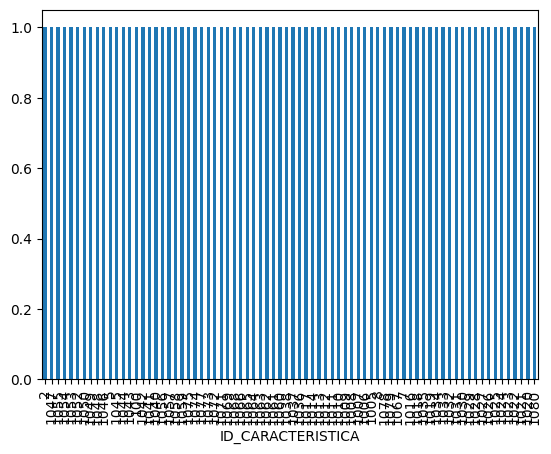

* DS_CARACTERISTICA :  ['núm.' 'Projector cossos' 'Accés per a minusvàlids' 'Porta secundària'
 "Identificador per a la consulta de l'ocupació a través de ws"
 'Perfils associats a la família de recursos' 'Càmara vídeo'
 'Canó projecció fix' 'Doble platina' 'DVD' 'Aire condicionat'
 "Cabines d'interpretació" 'Càmara digital' 'Càmera de control'
 'Capturadora  vídeo' 'Connexió xarxa' 'Escaner diapositives'
 'Escaner pla' 'Faristol' 'Filmadora diapositives' 'Filmadora VHS'
 'Interconnexió de dues aules' 'Megafonia' 'Micròfon corbata' 'Minidisc'
 "Monitor d'ordinador" 'Negatoscopi' 'Pantalla carril' 'Papelògraf'
 'Piano' 'Projector diapositives' 'Punter làser' 'Rac de vídeos'
 'Reproductor CD/casette' 'Retroprojector' 'Tarima' 'Telèfon núm.'
 'Televisor' 'Traducció simultània (130 CAD)' 'Impressora' 'Ordinador'
 'Pissarra' "Classificació d'Espais" 'Taules' 'Vídeo' 'Mobiliari'
 'Capacitat docència' 'Capacitat exàmens'
 'Mampares (espais amb possibilitat de divisió)' 'Connexió USB PC'
 'Pan

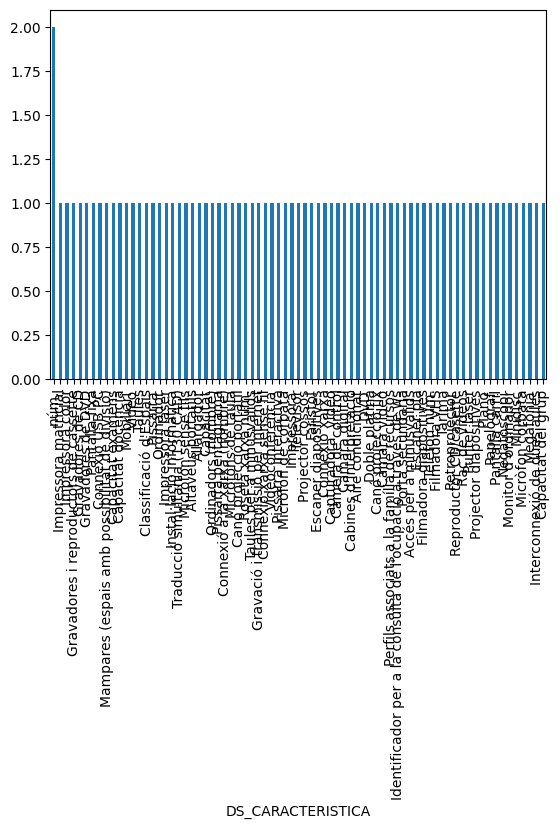

* QL_MEMO_CARACTERISTICA :  ['Codi divisió' 'Projec_cosos' 'Ac_ minusvàl.' 'Porta_secu' 'ID_OCUPACION'
 'ROLES_ASOCIADOS' 'Codi campus' 'C_vídeo' 'Canó' 'D_ platina' 'DVD'
 'A_condic.' 'Cabines' 'C_ digital' 'C_control' 'Capturadora' 'C_xarxa'
 'Escaner' 'E_pla' 'Faristol' 'Fil_diapos' 'Fil_VHS' 'Interconnexió'
 'Megafonia' 'Micròfon' 'Minidisc' 'Monitor' 'Negatoscopi' 'P_carril'
 'Papelògraf' 'Piano' 'Projec_diapos' 'P_làser' 'Rac_vídeo' 'Repro_CD'
 'Retroprojector' 'Tarima' 'Telef.' 'TV' 'Trad_simultàn.' 'Impressora'
 'Ordinador' 'Pissarra' 'ClasseEspai' 'Taules' 'Vídeo' 'Mobiliari'
 'Capacitat doc.' "Capac. d'examen" 'Mampares' 'C_USB PC' 'P_fixa'
 'Grav_DVD' 'Grav_CD' 'Grav_cass' 'Impr_color' 'Impr_laser' 'Impr_matri'
 'Ins_nform' 'Micr_ma' 'Micro_corb' 'Pissa_elec' 'Vidi_conf' 'C_xarxa s/'
 'Grav_inter' 'Tau_minusv' 'Roseta' 'Canó_port' 'Micro_taul' 'C-Xarxa-Q'
 'Pissa_pent' 'Ordin.nomb' 'Capacitat' 'Allargador' 'Altaveus_p'
 'CAPA_GRU']
QL_MEMO_CARACTERISTICA
Codi divisió       1

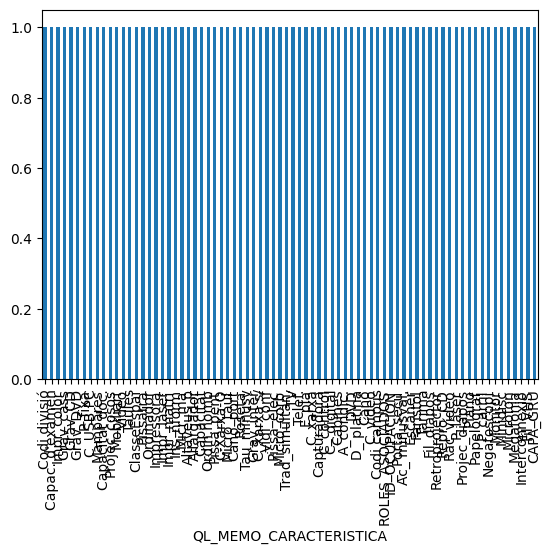

* ID_TP_VAL_CARAC :  ['E' 'B' 'C' 'L']
ID_TP_VAL_CARAC
B    55
E    10
L     8
C     3
Name: count, dtype: int64


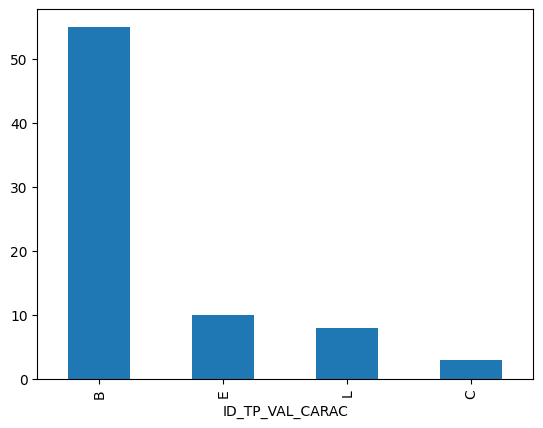

,ID_CARACTERISTICA,DS_CARACTERISTICA,QL_MEMO_CARACTERISTICA,ID_TP_VAL_CARAC
1,2,núm.,Codi divisió,E
2,5,Projector cossos,Projec_cosos,B
3,7,Accés per a minusvàlids,Ac_ minusvàl.,B
4,1067,Porta secundària,Porta_secu,C
5,1079,Identificador per a la consulta de l'ocupació ...,ID_OCUPACION,C


In [35]:
# Order by ID_CARACTERISTICA
#carac = carac.sort_values(by='ID_RECURS')
carac.head()

# In column QL_ group S/N, sn and S/n. Replace by S/N
carac['QL_MAGNITUD_CARACTERISTICA'] = carac['QL_MAGNITUD_CARACTERISTICA'].replace(['s/n', 's/n.'], 'S/N')

# Drop rows with -1 value in of ID_TP_VAL_CARAC column
carac = carac[carac['ID_TP_VAL_CARAC'] != -1]
carac = carac[carac['ID_CARACTERISTICA'] != -1]

# Drop rows that have S value in column ID_SN_BAIXA_TCARAC "s'han donat de baixa"
carac = carac[carac['ID_SN_BAIXA_TCARAC'] != 'S']
# Drop column QL_MAGNITUD_CARACTERISTICA
carac = carac.drop(columns=['QL_MAGNITUD_CARACTERISTICA', 'ID_SN_DUPLICAR_RECURS', 'ID_SN_BAIXA_TCARAC'])

# Drop rows with content in column ID_DATA_BAIXA_TCARAC
carac = carac[carac['ID_DATA_BAIXA_TCARAC'].isnull()]
carac = carac.drop(columns=['ID_DATA_BAIXA_TCARAC'])


# Print different values for each column and plot count and sort by count
for col in carac:
    print("*", col, ": ", carac[col].unique())
    
    print(carac[col].value_counts())
    carac[col].value_counts().plot(kind='bar')
    
    plt.show()

carac.head()

In [36]:
# Count lines
print("Count lines: ", carac.shape[0])
# Count lines
print("Count lines: ", rec_carac.shape[0])

Count lines:  76
Count lines:  520329


In [37]:
# Show Nan values count for each column
carac.isnull().sum()
rec_carac.isnull().sum()

ID_RECURS                  0
ID_CARACTERISTICA          0
ID_CENTRE_ADMINISTRADOR    0
dtype: int64

In [41]:
# Save data
carac.to_csv(path + 'cleaned-data/' + 'caracteristicas.csv', index=False)
rec_carac.to_csv(path + 'cleaned-data/' + 'recursos_caracteristicas.csv', index=False)

In [39]:
# Join datasets caracteristicas and recursos_caracteristicas by ID_CARACTERISTICA
merged_data = pd.merge(carac, rec_carac, on='ID_CARACTERISTICA')

# Save the merged dataset
merged_data.to_csv(path + 'cleaned-data/' + 'merged_caracteristicas_recursos.csv', index=False)

In [40]:
# Merge datasets with indicator
merged_data = pd.merge(rec_carac, carac, on='ID_CARACTERISTICA', how='outer', indicator=True)

# Filter rows that are not merged
not_merged_data = merged_data[merged_data['_merge'] != 'both']

# Save the not merged dataset
not_merged_data.to_csv(path + 'cleaned-data/' + 'not_merged_caracteristicas_recursos.csv', index=False)